# Exploratory Analisis Of Olimpic Medal Data

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> Import cleaned data

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Population,GDP_per_Capita,Gold,Silver,Bronze,Prev_Medals_Won,Prev_Gold_Medals_Won,Prev_Silver_Medals_Won,Prev_Bronze_Medals_Won
0,1896,Athens,Aquatics,Swimming,HAJOS_Alfred,HUN,Men,100M Freestyle,Gold,9844686.0,12363.543460,1,0,0,0,0,0,0
1,1896,Athens,Aquatics,Swimming,HERSCHMANN_Otto,AUT,Men,100M Freestyle,Silver,8611088.0,43774.985174,0,1,0,0,0,0,0
2,1896,Athens,Aquatics,Swimming,DRIVAS_Dimitrios,GRE,Men,100M Freestyle For Sailors,Bronze,10823732.0,18002.230578,0,0,1,0,0,0,0
3,1896,Athens,Aquatics,Swimming,MALOKINIS_Ioannis,GRE,Men,100M Freestyle For Sailors,Gold,10823732.0,18002.230578,1,0,0,0,0,0,0
4,1896,Athens,Aquatics,Swimming,CHASAPIS_Spiridon,GRE,Men,100M Freestyle For Sailors,Silver,10823732.0,18002.230578,0,1,0,0,0,0,0


# Continuos Variables

In [4]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal', 'Population', 'GDP_per_Capita', 'Gold', 'Silver',
       'Bronze', 'Prev_Medals_Won', 'Prev_Gold_Medals_Won',
       'Prev_Silver_Medals_Won', 'Prev_Bronze_Medals_Won'],
      dtype='object')

In [46]:
df_conti = df[['Year', 'Population', 'GDP_per_Capita', 'Prev_Medals_Won', 'Prev_Gold_Medals_Won', 'Prev_Silver_Medals_Won', 'Prev_Bronze_Medals_Won']]

Histogram of Year


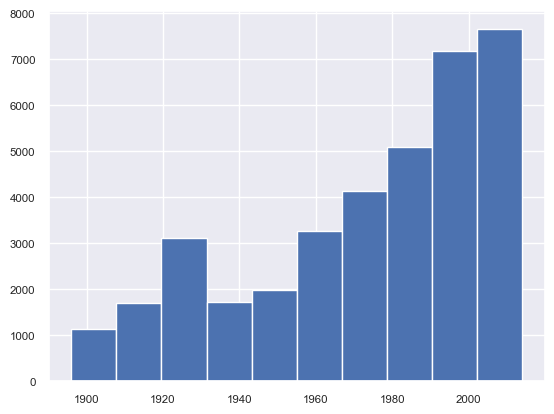

Histogram of Population


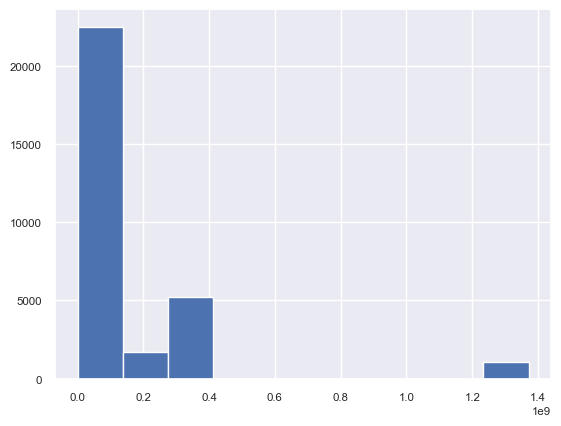

Histogram of GDP_per_Capita


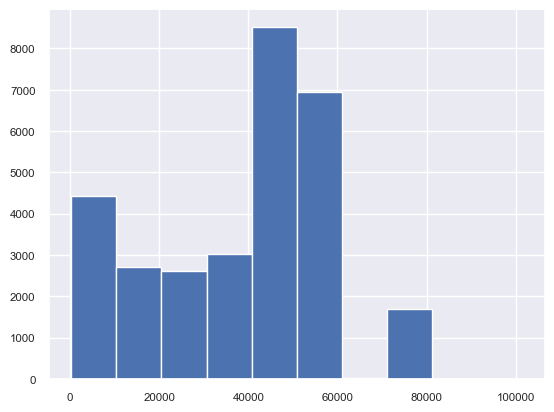

Histogram of Prev_Medals_Won


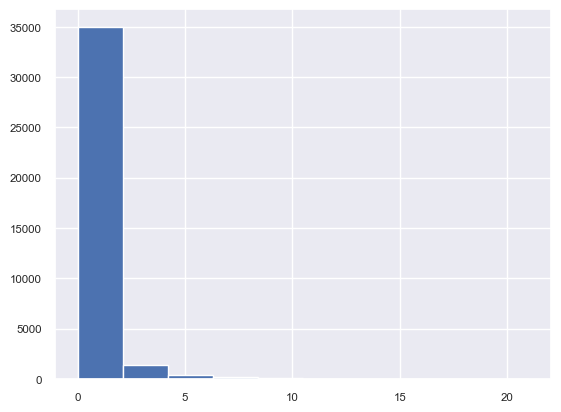

Histogram of Prev_Gold_Medals_Won


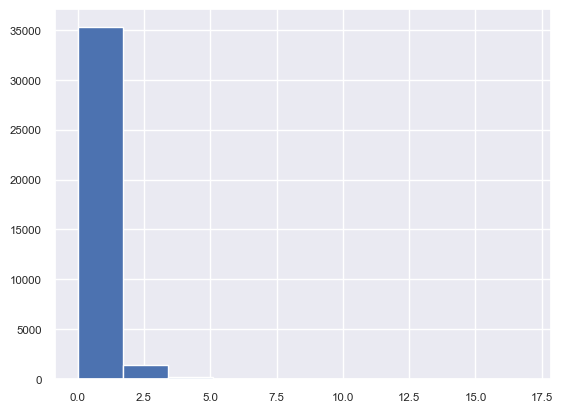

Histogram of Prev_Silver_Medals_Won


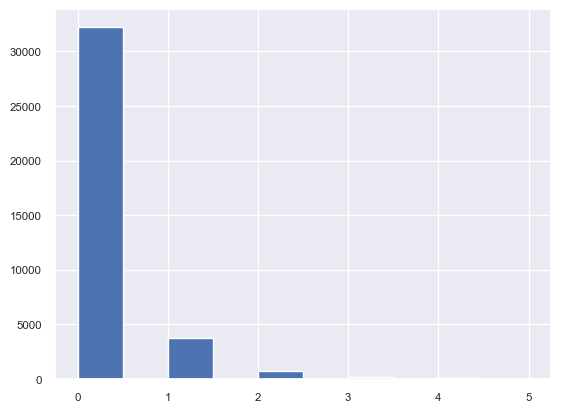

Histogram of Prev_Bronze_Medals_Won


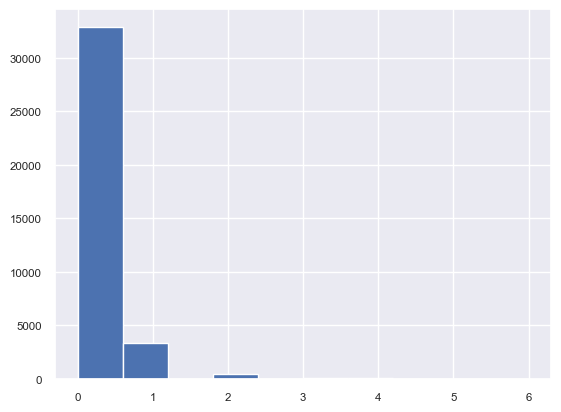

In [56]:
for k in df_conti:
    print("Histogram of %s" %(k))
    df_conti[k].hist()
    plt.show()

<b> None of our continuos variables seem to have an aproximatly normal distribution so it might be worth trying to normalize them before atempting to create our model.

## Corelation Heatmap Of Continuos Variables

In [18]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal', 'Population', 'GDP_per_Capita', 'Gold', 'Silver',
       'Bronze', 'Prev_Medals_Won', 'Prev_Gold_Medals_Won',
       'Prev_Silver_Medals_Won', 'Prev_Bronze_Medals_Won'],
      dtype='object')

In [55]:
df_conti.corr()

,Year,Population,GDP_per_Capita,Prev_Medals_Won,Prev_Gold_Medals_Won,Prev_Silver_Medals_Won,Prev_Bronze_Medals_Won
Year,1.000000,0.102951,-0.234526,0.062834,0.046272,0.045618,0.045978
Population,0.102951,1.000000,-0.177481,0.018994,0.037350,0.005641,-0.015625
GDP_per_Capita,-0.234526,-0.177481,1.000000,0.041498,0.041638,0.029146,0.012290
Prev_Medals_Won,0.062834,0.018994,0.041498,1.000000,0.822634,0.706205,0.611797
Prev_Gold_Medals_Won,0.046272,0.037350,0.041638,0.822634,1.000000,0.339543,0.244376
Prev_Silver_Medals_Won,0.045618,0.005641,0.029146,0.706205,0.339543,1.000000,0.258939
Prev_Bronze_Medals_Won,0.045978,-0.015625,0.012290,0.611797,0.244376,0.258939,1.000000


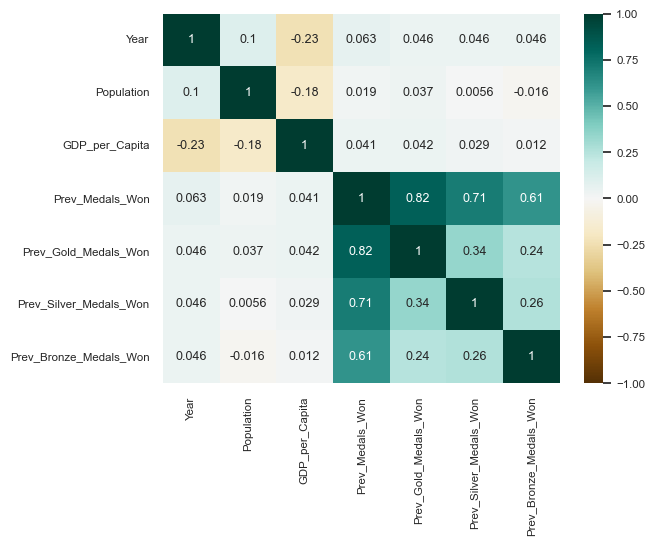

In [54]:
heatmap = sns.heatmap(df_conti.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

<b> Here we see that Prev_Medals_Won has  very high corelation with the other previos medals won variables so we might not want to include Prev_Medals_Won in our final model to avoid multicollinearity.

# Catigorical Variables

In [21]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal', 'Population', 'GDP_per_Capita', 'Gold', 'Silver',
       'Bronze', 'Prev_Medals_Won', 'Prev_Gold_Medals_Won',
       'Prev_Silver_Medals_Won', 'Prev_Bronze_Medals_Won'],
      dtype='object')

In [38]:
df_cat = df[['City', 'Sport', 'Discipline', 'Country', 'Gender', 'Event', 'Medal', 'Gold', 'Silver', 'Bronze']]

Bargraph of City : Total 41


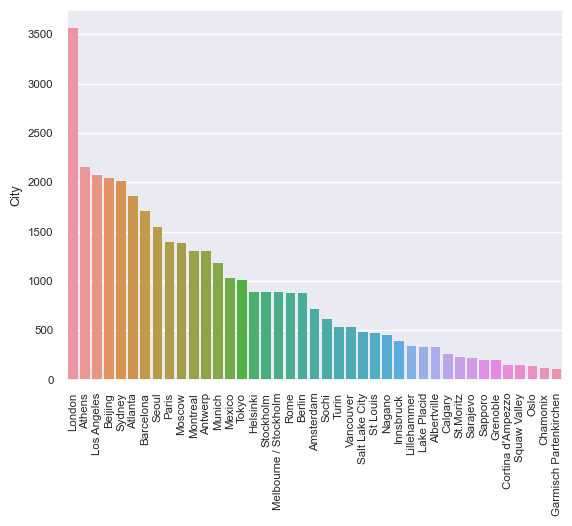

Bargraph of Sport : Total 48


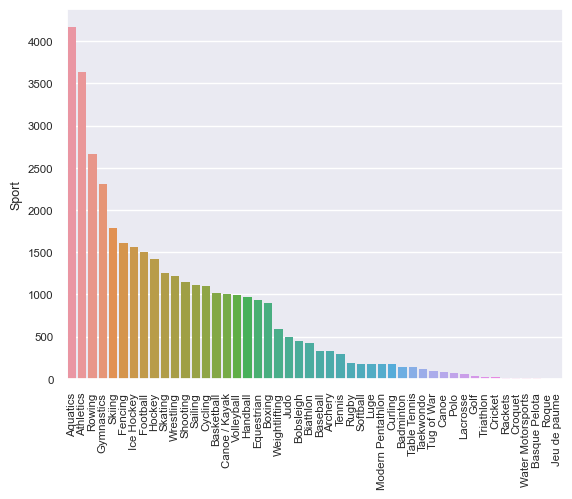

Bargraph of Discipline : Total 80


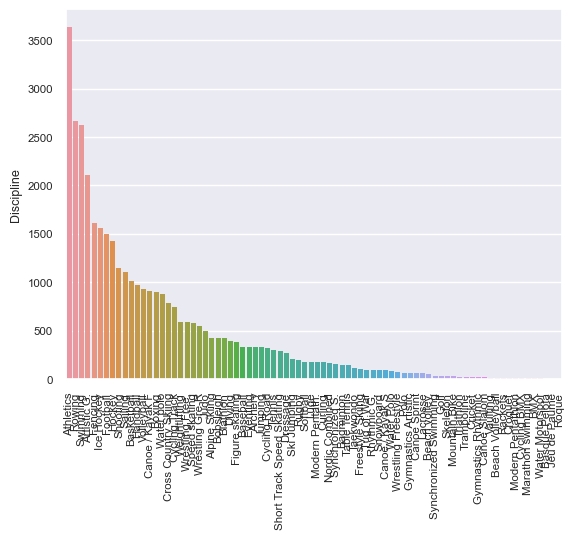

Bargraph of Country : Total 148


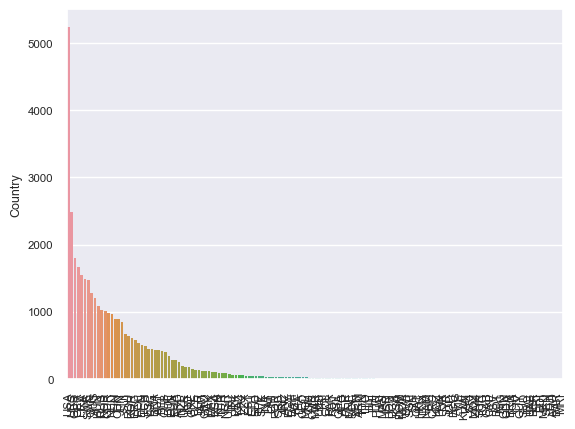

Bargraph of Gender : Total 2


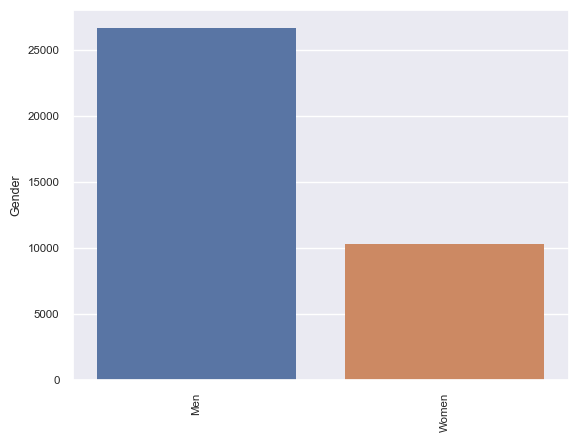

Bargraph of Event : Total 733


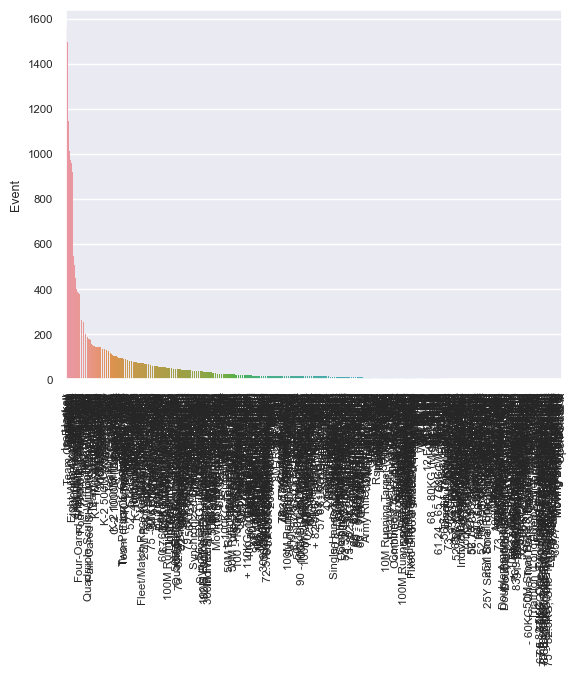

Bargraph of Medal : Total 3


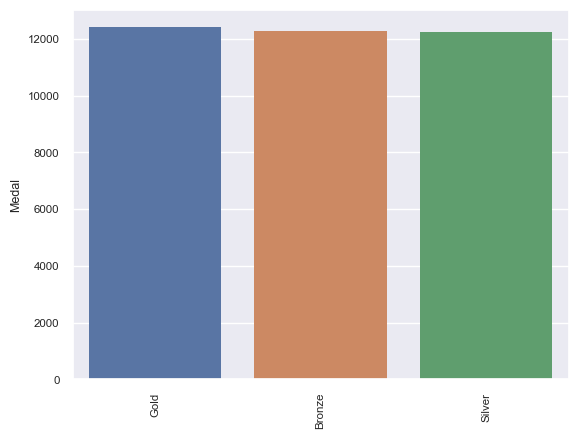

Bargraph of Gold : Total 2


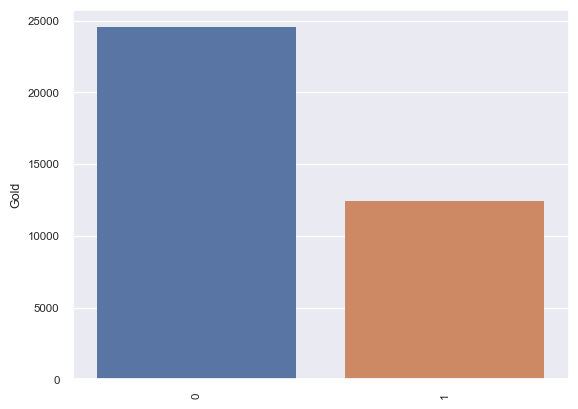

Bargraph of Silver : Total 2


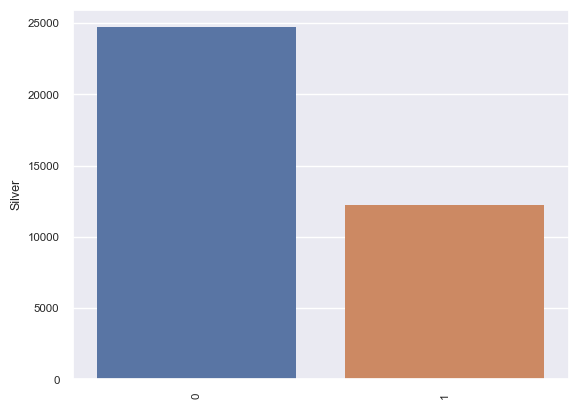

Bargraph of Bronze : Total 2


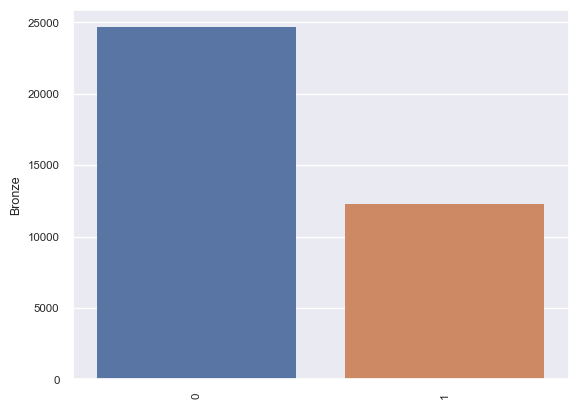

In [43]:
sns.set(font_scale=.75)
for k in df_cat:
    print("Bargraph of %s : Total %d" %(k, len(df_cat[k].value_counts())))
    sns.barplot(x=df_cat[k].value_counts().index, y=df_cat[k].value_counts(), linewidth=0)
    plt.xticks(rotation= 90)
    plt.show()

<b> Since there is so many catigories for alot of the variables I will look at the top 20 catigoies of the graphs I think provide the most insights.

Bargraph of Country : Total 148


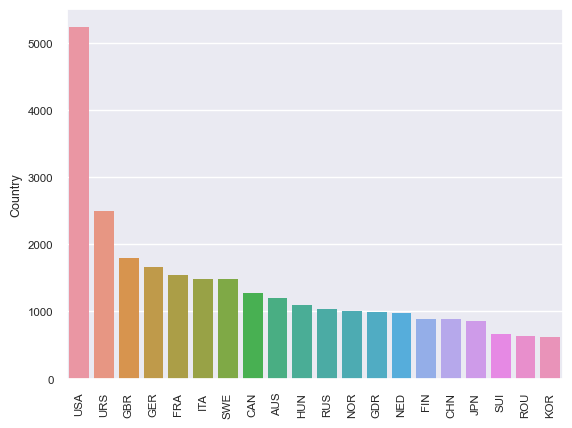

Bargraph of Event : Total 733


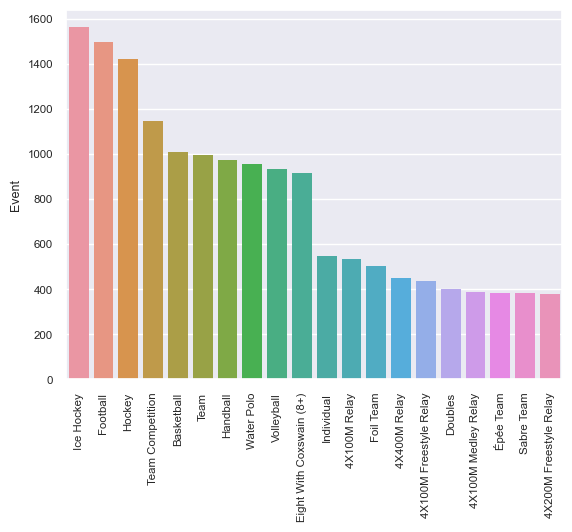

Bargraph of Discipline : Total 80


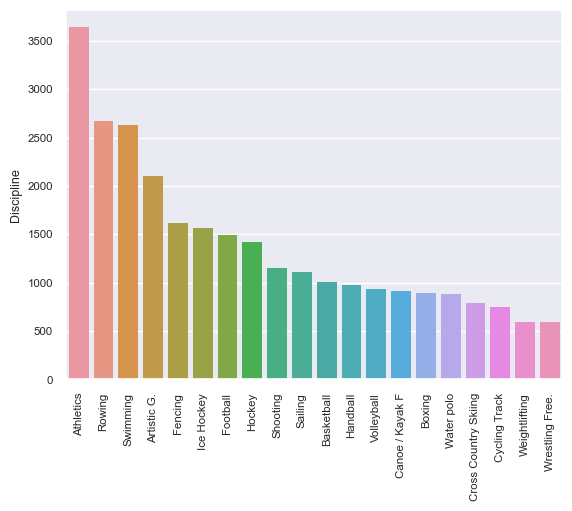

Bargraph of Sport : Total 48


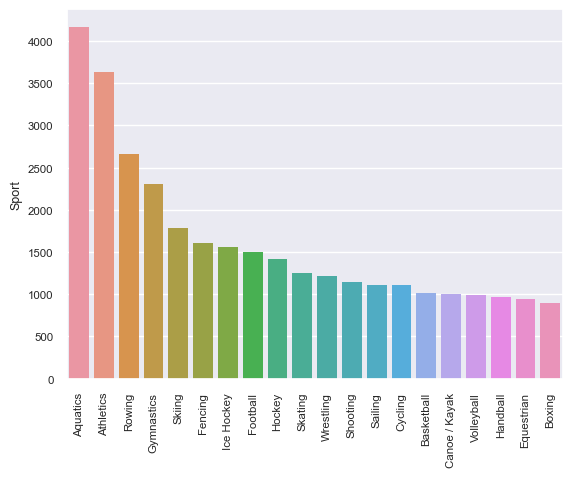

In [62]:
for k in df[['Country', 'Event', 'Discipline', 'Sport']]:
    print("Bargraph of %s : Total %d" %(k, len(df_cat[k].value_counts())))
    sns.barplot(x=df_cat[k].value_counts()[:20].index, y=df_cat[k].value_counts()[:20], linewidth=0)
    plt.xticks(rotation= 90)
    plt.show()

## Pivot Tables

In [64]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal', 'Population', 'GDP_per_Capita', 'Gold', 'Silver',
       'Bronze', 'Prev_Medals_Won', 'Prev_Gold_Medals_Won',
       'Prev_Silver_Medals_Won', 'Prev_Bronze_Medals_Won'],
      dtype='object')

In [80]:
pd.set_option('display.max_rows', None)

<b> Number of Countrys Gold Medals

In [93]:
df.pivot_table( index= ['Country'], values= 'Gold', aggfunc= 'count').sort_values('Gold', ascending= False)

,Gold
Country,
USA,5238
URS,2489
GBR,1799
GER,1665
FRA,1548
ITA,1488
SWE,1477
CAN,1274
AUS,1204


<b> Most Gold Medals Won In A Year By Country

In [95]:
df.pivot_table( index= ['Country', 'Year'], values= 'Gold', aggfunc= 'count').sort_values('Gold', ascending= False)

,,Gold
Country,Year,
URS,1980,496
USA,1904,394
URS,1988,361
GBR,1908,347
USA,1984,342
URS,1976,341
USA,2008,315
GDR,1980,299
EUN,1992,283


<b> Most Gold Medals Won In a Sport By Country

In [96]:
df.pivot_table( index= ['Sport', 'Country'], values= 'Gold', aggfunc= 'count').sort_values('Gold', ascending= False)

,,Gold
Sport,Country,
Aquatics,USA,1184
Athletics,USA,994
Aquatics,AUS,400
Rowing,USA,364
Ice Hockey,CAN,359
Fencing,ITA,344
Basketball,USA,318
Skiing,NOR,297
Athletics,GBR,295


<b> Most Gold Medals Wone By Diferent Gender and Country

In [104]:
df.pivot_table( index= ['Country', 'Gender'], values= 'Gold', aggfunc= 'count').sort_values('Gold', ascending= False)

,,Gold
Country,Gender,
USA,Men,3618
URS,Men,1807
USA,Women,1620
GBR,Men,1470
FRA,Men,1351
ITA,Men,1292
SWE,Men,1280
GER,Men,1119
HUN,Men,840


<b> Gold Medals Won By Countrys With Highest GDP Per Capita

In [98]:
df.pivot_table( index= ['Country','GDP_per_Capita'], values= 'Gold', aggfunc= 'count').sort_values('GDP_per_Capita', ascending= False)

,,Gold
Country,GDP_per_Capita,
LUX,101449.968168,4
SUI,80945.079219,665
NOR,74400.369777,1011
QAT,73653.394435,4
IRL,61133.672427,30
AUS,56310.962993,1204
USA,56115.718426,5238
SIN,52888.744672,4
DEN,51989.293471,512


<b> Gold Medals Won By Countrys With Highest Population

In [99]:
df.pivot_table( index= ['Country','Population'], values= 'Gold', aggfunc= 'count').sort_values('Population', ascending= False)

,,Gold
Country,Population,
CHN,1.371220e+09,889
IND,1.311051e+09,184
USA,3.214188e+08,5238
INA,2.575638e+08,38
BRA,2.078475e+08,431
PAK,1.889249e+08,121
NGR,1.822020e+08,84
RUS,1.440968e+08,1031
MEX,1.270172e+08,106


<b> Number Of Total Medals Won By County For Each Sport

In [102]:
df.pivot_table( index= ['Country', 'Sport'], values= 'Medal', aggfunc= 'count').sort_values('Country', ascending= False)

Medal
Country Sport                   
ZZX     Tug of War             6
        Tennis                14
        Rowing                 3
        Polo                  12
        Fencing                3
        Athletics             10
ZIM     Hockey                16
        Aquatics               7
ZAM     Athletics              1
        Boxing                 1
YUG     Handball              72
        Aquatics              91
        Athletics              2
        Basketball            96
        Boxing                11
        Canoe / Kayak          7
        Football              73
        Gymnastics            18
        Shooting               6
        Judo                   2
        Rowing                13
        Skiing                 7
        Table Tennis           4
        Volleyball            24
        Wrestling             16
VIE     Weightlifting          1
        Taekwondo              1
VEN     Fencing                1
        Aquatics               1
        Athletics              1
        Boxing                 5
        Taekwondo              2
        Shooting               1
        Weightlifting          1
UZB     Wrestling              7
        Skiing                 1
        Judo                   4
        Gymnastics             2
        Boxing                 7
USA     Cycling               66
        Jeu de paume           1
        Ice Hockey           280
        Hockey                28
        Gymnastics           178
        Golf                  27
        Football             132
        Fencing               52
        Equestrian           121
        Boxing               111
        Curling                5
        Canoe / Kayak         21
        Lacrosse              13
        Bobsleigh             93
        Basketball           318
        Baseball              68
        Athletics            994
        Archery               55
        Judo                  12
        Aquatics            1184
        Luge                   9
        Softball              60
        Modern Pentathlon     17
        Wrestling            129
        Weightlifting         43
        Volleyball           114
        Triathlon              1
        Tennis                54
        Taekwondo              8
        Tug of War            15
        Skiing                98
        Shooting             190
        Sailing              139
        Polo                   9
        Rugby                 46
        Rowing               364
        Roque                  3
        Skating              180
URU     Cycling                1
        Basketball            24
        Boxing                 1
        Rowing                 6
        Football              44
URS     Football              91
        Fencing              145
        Boxing                51
        Equestrian            43
        Cycling               51
        Canoe / Kayak         87
        Aquatics             190
        Bobsleigh              8
        Biathlon              37
        Basketball           146
        Archery                7
        Handball              85
        Gymnastics           290
        Athletics            238
        Hockey                32
        Shooting              49
        Ice Hockey           168
        Wrestling            116
        Volleyball           144
        Skiing               116
        Skating              104
        Weightlifting         62
        Sailing               20
        Rowing               152
        Modern Pentathlon     27
        Luge                   7
        Judo                  23
UKR     Gymnastics            27
        Aquatics              11
        Archery                8
        Athletics             20
        Boxing                14
        Canoe                  3
        Canoe / Kayak          6
        Cycling                6
        Fencing                7
        Biathlon               8
        Handball              15
 

# Summary Of Exploratory Analasis Results

### Continuos Variables
When looking at the continuos variables there are three key take aways I found.
- Firstly most of the continuos variables are not normaly distributed so it will probably be worth trying to normalize them when we apply this data to our Gold medal clasification model.
- Second when we looked at he corelation heat map we could see that Previos_Medals_Won was very highly corelated with the other previos medal variables as intuition would assume, this means that we should experiment with leaving it out of our Gold medal clasification model in attempts to avoid multicolliniarity.
- Lastly, all of the previos medal one histograhms showed that there is a very small sample size of people that have been able to maintin podium placing abillity over the years it it would probalbly be vary interesting to look a those few examples to see if we can find any similaritys between them.

### Catigorical Variables
Within the catigorical variables there was a lot of interesting findings but these were the ones i found most notable.
- Aquatic sports are the most prevelent sports at the olimpics followed closly by Athetics so if your a country and your goal is to come home with the most medals i think it is a reasonable stratagy to invest the most amount of money into those sports.
- The USA has one around twice as manny gold medals as the nex higest country.
- Throughout the time frame this data was collected there have been around twice as manny mens medals awarded as wommens medals.

### Pivot Tables
    - The USA has won the most medals and has also won the most medals in aquatics, this is very interesting because it     shows either that the USA knows that aquatics are the most frequent sport in the olimpics and have therefor invested    more resorses into that programe. Or since they have one the most medals overall they have probalby won the most medals in alot of sports, so it would be worth looking at this a proportion if I was going to expolore any further.
    - Population was not have as big a factor in the number of gold medals a country had won as I had thought it would.
    - GDP per Capita was not have as big a factor in the number of gold medals a country had won as I had thought it would.